Here we are importing a couple of different libraries that have been used before. We are importing `GaussianMixture` in order to create Gaussian Mixture Models.

In [109]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


The dataset being imported consists of customer data, including information such as 

* `Gender`
* `Age`
* `Annual Income ($)`
* `Spending Score (1-100)`
* `Profession`
* `Work Experience`
* `Family Size`

In [ ]:
# Load customer data (replace 'customer_data.csv' with your dataset)
customer_data = pd.read_csv('../../datasets/Customers.csv')

I am particularly interested in using variables that are continuous, which are `Age`, `Annual Income`, and `Work Experience`. We are using these variables as features for segmentation

In [ ]:
selected_features = ['Age', 'Annual Income ($)', 'Work Experience']

Here we are preprocessing by extracting and scaling the selected features

In [112]:

customer_features = customer_data[selected_features]
customer_features = (customer_features - customer_features.mean()) / customer_features.std()

We can create a GMM by creating 3 clusters of the data and then fitting it based on the preprocessed data. 

We are then predicting the labels and then assigning it to a column called `Cluster`

In [113]:
num_clusters = 3
gmm = GaussianMixture(n_components=num_clusters)
gmm.fit(customer_features)
cluster_labels = gmm.predict(customer_features)
customer_data['Cluster'] = cluster_labels

Finally, we plot the data on a scatterplot.

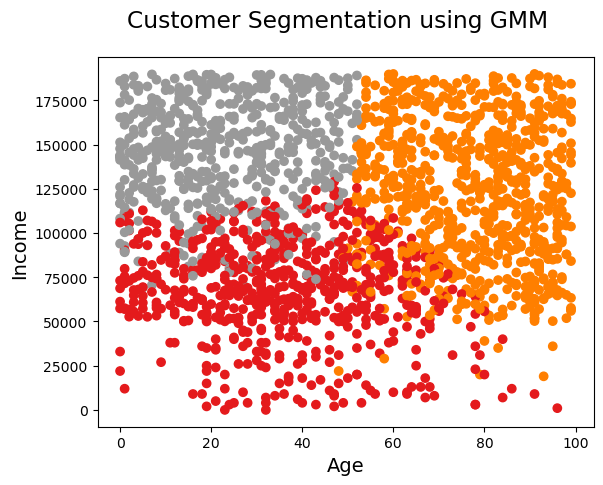

In [114]:
plt.scatter(x=customer_data["Age"], y=customer_data["Annual Income ($)"], c=cluster_labels, cmap="Set1")
plt.xlabel("Age")
plt.ylabel("Income")
plt.suptitle('Customer Segmentation using GMM')
plt.show()